In [ ]:
%tensorflow_version 1.x
import keras
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.optimizers import Adam, SGD
from keras.layers.core import Dropout
 
 
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import os
 
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
%tensorflow_version 1.x
import tensorflow

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
ls /content/gdrive/My\ Drive/ColabNotebooks

 1.jpg      'DATA SET TA'/   Mina/             Untitled1.ipynb
 datasets/   logo.png        Untitled0.ipynb


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
#### Updated ####

#### Updated ####
### The following two lines caused the issue:
import sys
sys.path.append('/content/gdrive/My Drive')
### Replacing the above with these two lines solved the issue:
import os
os.chdir('/content/gdrive/My Drive') # Ch working directory to project folder
###

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#setting path gambar di gdrive

print("[INFO] loading images...")
#imagePaths = paths.list_images('DATA SET TA')
imagePaths = paths.list_images('Data Set TA')

#imagePaths = paths.list_images('Dataset150')

data = []
labels = []
gambar = []
aug = []
labels2 = []

[INFO] loading images...


In [ ]:
#gk usah
#ini asli aja
for imagePath in imagePaths:

  image = Image.open(imagePath)
  image = np.array(image.resize((224,224))) / 255.0
  data.append(image)

  label = imagePath.split(os.path.sep) [-2]
  labels.append(label)

KeyboardInterrupt: ignored

In [ ]:
#Function buat Augmentasi
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
#masukin gambar warna dengan augmentasi dan asli 

for imagePath in imagePaths:

  a = Image.open(imagePath)
  image = np.array(a.resize((224,224))) / 255.0
  x = image

  data.append(x)
  label = imagePath.split(os.path.sep) [-2]
  labels.append(label)

  aug.append(x)
  x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
  
  i = 0
  label = imagePath.split(os.path.sep) [-2]
  labels2.append(label)
  for batch in datagen.flow(x, batch_size=1):
    mas = x[0,:,:,:] #( 150, 150, 3)
    aug.append(mas)
    label = imagePath.split(os.path.sep) [-2]
    labels2.append(label)
    i += 1
    if i % 3 == 0:
      break 
  


In [ ]:
#ini one hot encodingnya dataset pake augmentasi, bisa dipake warna dan gray
print(labels2)
lb = LabelBinarizer()
labels2 = lb.fit_transform(labels2)
print(labels2)

['GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1',

In [ ]:
#ini one hot encoding dataset tanpa augmentasi, 
print(labels)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

['GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB1', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2', 'GMB2',

In [ ]:
#ini set data Train kalau pake augmen

(trainX, dumbx, trainY, dumby) = train_test_split(np.array(aug),
np.array(labels2), test_size=0.004)
print(trainX.shape)
print(trainY.shape)

(4382, 224, 224, 3)
(4382, 11)


In [ ]:
#ini set data Test kalau pake augmen
#ini dan cell atas harus di run

(dumbx,testX, dumby, testY) = train_test_split(np.array(data),
np.array(labels), test_size=0.40)
print(testX.shape)
print(testY.shape)

(440, 224, 224, 3)
(440, 11)


In [ ]:
print(labels)

['GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 9', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 11', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GMB 3', 'GM

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#ini buat dataset asli aja
(trainX,testX, trainY, testY) = train_test_split(np.array(data),
np.array(labels), test_size=0.20)
print(trainX.shape)
print(testX.shape)

(356, 224, 224, 3)
(90, 224, 224, 3)


In [ ]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1',
                        kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [ ]:
def ResNet50(input_shape=(224, 224, 3), classes=11):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
def ResNet101(input_shape=(224, 224, 3), classes=11):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='g')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='h')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='i')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='j')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='k')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='l')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='m')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='n')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='o')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='p')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='q')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='r')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='s')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='t')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='u')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='v')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='w')

    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2,2), name="avg_pool")(X)
    X = Dropout(0.25, name = "do")(X)


    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
#model = ResNet50(input_shape = (224, 224, 3), classes = 11)
model = ResNet101(input_shape = (224, 224, 3), classes = 11)



Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [ ]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
opt = SGD(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

#model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
H=model.fit(trainX, trainY,validation_data=(testX, testY), epochs = 55, batch_size = 32)
predY=model.predict(testX)



Train on 4382 samples, validate on 440 samples
Epoch 1/55
4382/4382 [==============================] - 196s 45ms/step - loss: 4.6617 - accuracy: 0.1120 - val_loss: 4.9582 - val_accuracy: 0.1500
Epoch 2/55
4382/4382 [==============================] - 179s 41ms/step - loss: 3.1410 - accuracy: 0.1495 - val_loss: 2.9977 - val_accuracy: 0.1341
Epoch 3/55
4382/4382 [==============================] - 180s 41ms/step - loss: 2.7586 - accuracy: 0.1871 - val_loss: 2.7429 - val_accuracy: 0.1773
Epoch 4/55
4382/4382 [==============================] - 180s 41ms/step - loss: 2.4648 - accuracy: 0.2339 - val_loss: 2.3836 - val_accuracy: 0.2750
Epoch 5/55
4382/4382 [==============================] - 180s 41ms/step - loss: 2.0938 - accuracy: 0.3115 - val_loss: 1.8970 - val_accuracy: 0.3250
Epoch 6/55
4382/4382 [==============================] - 180s 41ms/step - loss: 1.7665 - accuracy: 0.4160 - val_loss: 1.6918 - val_accuracy: 0.4432
Epoch 7/55
4382/4382 [==============================] - 180s 41ms/step

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

        GMB1       1.00      1.00      1.00        36
       GMB10       0.98      0.96      0.97        46
       GMB11       0.97      0.97      0.97        36
        GMB2       0.93      0.91      0.92        46
        GMB3       0.91      0.93      0.92        45
        GMB4       1.00      1.00      1.00        39
        GMB5       0.98      1.00      0.99        40
        GMB6       1.00      1.00      1.00        45
        GMB7       1.00      1.00      1.00        31
        GMB8       1.00      1.00      1.00        41
        GMB9       1.00      1.00      1.00        35

    accuracy                           0.98       440
   macro avg       0.98      0.98      0.98       440
weighted avg       0.98      0.98      0.98       440



In [ ]:
test_score = model.evaluate(testX, testY)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

440/440 [==============================] - 6s 13ms/step
Test loss 0.0733, accuracy 97.73%


Text(0, 0.5, 'acc')

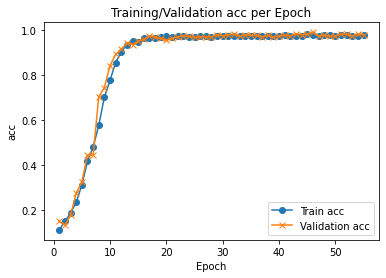

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + H.history['accuracy'], 'o-')
ax.plot([None] + H.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

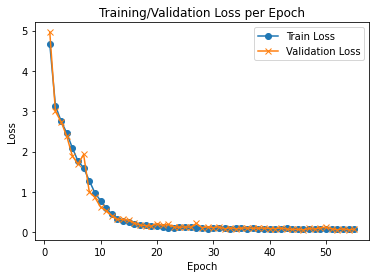

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + H.history['loss'], 'o-')
ax.plot([None] + H.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [ ]:
#Confusion Matrix
#run
from sklearn.metrics import multilabel_confusion_matrix

predY[1]
rounded_labels=np.argmax(predY, axis=1)
rounded_labels[1]
rounded_predict=np.argmax(testY, axis=1)
rounded_predict[1]
print(confusion_matrix(rounded_labels, rounded_predict))


In [ ]:
#run ini dulu baru atas
import numpy as np


def plot_confusion_matrix(cm,
                          target_names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    if normalize:
      plt.imshow(cm/7, interpolation='nearest', cmap=cmap)
    else:
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
cm = confusion_matrix(rounded_labels,  rounded_predict)
plot_confusion_matrix(cm)

In [ ]:
H.history

{'accuracy': [0.11204929,
  0.14947513,
  0.18712917,
  0.23391145,
  0.3115016,
  0.4160201,
  0.47991785,
  0.5753081,
  0.70104975,
  0.7749886,
  0.85417616,
  0.90187126,
  0.93359196,
  0.9486536,
  0.9440895,
  0.9614331,
  0.9648562,
  0.96531266,
  0.9664537,
  0.97215885,
  0.96964854,
  0.9739845,
  0.971246,
  0.9678229,
  0.9678229,
  0.97215885,
  0.9719306,
  0.9694204,
  0.97375625,
  0.97033316,
  0.97375625,
  0.97284347,
  0.97307163,
  0.97284347,
  0.97261524,
  0.97147423,
  0.9717024,
  0.97307163,
  0.9739845,
  0.971246,
  0.9744409,
  0.97375625,
  0.970105,
  0.97261524,
  0.9787768,
  0.97786397,
  0.97329986,
  0.9744409,
  0.9748973,
  0.9739845,
  0.9742127,
  0.9753537,
  0.97284347,
  0.9705614,
  0.9742127],
 'loss': [4.661718864519266,
  3.1409737515373353,
  2.758627399142503,
  2.4648454159919884,
  2.093780980105816,
  1.7664992426803046,
  1.599900993295371,
  1.2831117561667655,
  0.9800938419259775,
  0.7876715426954272,
  0.5955432770269639,
  